In [ ]:
%pip install basicsr facexlib realesrgan gfpgan

In [ ]:
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P ../models/
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P ../models/

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
from gfpgan import GFPGANer
from realesrgan import RealESRGANer
from basicsr.archs.rrdbnet_arch import RRDBNet

In [2]:
esrgan_arch = RRDBNet(
    num_in_ch=3,
    num_out_ch=3,
    num_feat=64,
    num_block=23,
    num_grow_ch=32,
    scale=4
)

bg_upsampler = RealESRGANer(
    scale=4,
    model=esrgan_arch,
    model_path="../models/RealESRGAN_x4plus.pth",
    tile=256,
    device=torch.device("cuda"),
    half=True
)

# Set up the GFPGAN restorer
restorer = GFPGANer(
    model_path="../models/GFPGANv1.3.pth",
    upscale=4,
    arch="clean",
    channel_multiplier=2,
    bg_upsampler=bg_upsampler,
    device=torch.device("cuda")
)

/home/fullerite/Documents/VSCode/NeuralPhotoRestoration/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fullerite/Documents/VSCode/NeuralPhotoRestoration/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


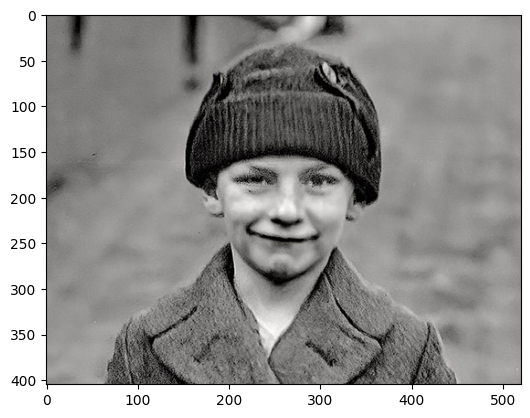

In [3]:
img = cv2.imread("../images/source/face_lq.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(img)
plt.show()

In [4]:
# Perform the restoration
cropped_faces, restored_faces, restored_img = restorer.enhance(
    img,
    has_aligned=False,
    only_center_face=False,
    paste_back=True
)

	Tile 1/6
	Tile 2/6
	Tile 3/6
	Tile 4/6
	Tile 5/6
	Tile 6/6


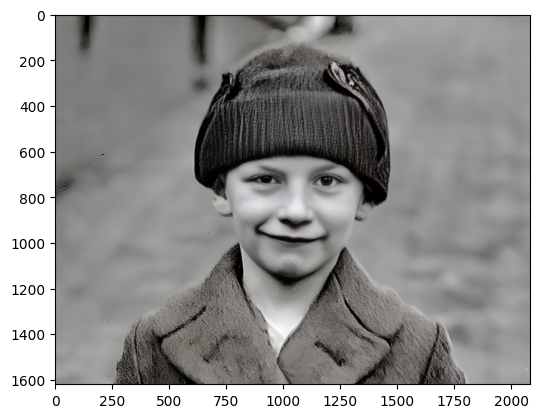

False

In [5]:
plt.imshow(restored_img)
plt.show()
cv2.imwrite("images/restored/restored_image.png", restored_img)